In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# generate synthetic data

x = [0.1]
y = [0.2]
for _ in range(10):
    new_x = x[-1] * (3.78 - 3.78 * x[-1])
    new_y = y[-1] * (3.77 - 3.77 * y[-1])
    x.append(new_x)
    y.append(new_y)

# for _ in range(2000000):
for _ in range(20000):
    new_x = x[-1] * (3.78 - 3.78 * x[-1])
    new_y = y[-1] * (3.77 - 3.77 * y[-1] - 0.8 * x[-10])
    x.append(new_x)
    y.append(new_y)

In [3]:
# plt.figure(figsize=(22, 6))

# plt.plot(x[:300])
# plt.plot(y[:300])

In [4]:
# plt.figure(figsize=(12, 12))

# # plt.plot(x[:300], y[:300], linewidth=0.3)
# plt.scatter(x, y, s=0.05)

In [5]:
# # correlation
# np.corrcoef(x, y)[0, 1]

# Reservoir computing

In [6]:
from pyrcn.echo_state_network import ESNRegressor

In [46]:
# reg = ESNRegressor(n_readout=1, n_components=1000, spectral_radius=0.9, random_state=42)
reg = ESNRegressor()

In [47]:
train_len = int(len(x) * 0.6)
X_train = np.array(y[:train_len]).reshape(-1, 1)
X_test = np.array(y[train_len:]).reshape(-1, 1)
y_train = np.array(x[:train_len])
y_test = np.array(x[train_len:])

In [48]:
reg.fit(X=X_train, y=y_train)


ESNRegressor(input_to_node=InputToNode(), node_to_node=NodeToNode(),
             regressor=IncrementalRegression(), requires_sequence=False)

In [49]:
y_pred = reg.predict(X_test)

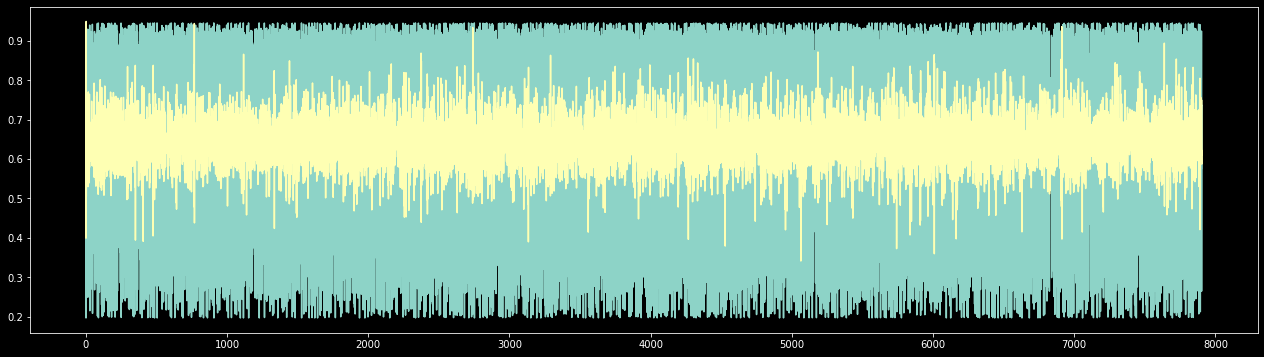

In [50]:
plt.figure(figsize=(22, 6))
# plt.ylim(-1, 1)

# plt.plot(y_test)
# plt.plot(y_pred)
plt.plot(y_test[100:])
plt.plot(y_pred[100:])

In [51]:
# correlation
np.corrcoef(y_test[100:], y_pred[100:])[0, 1]

0.11980271981891079

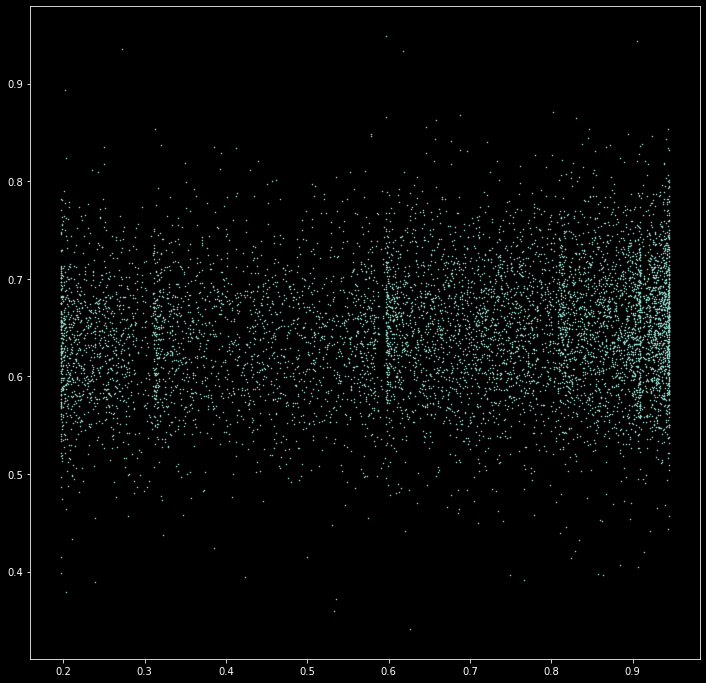

In [52]:
# scatter plot
plt.figure(figsize=(12, 12))
plt.scatter(y_test[100:], y_pred[100:], s=0.3)